# Feature Selection from Mobile data using Mutual Information Gain filter method
Dataset: [https://raw.githubusercontent.com/subashgandyer/datasets/main/mobile_price_train.csv]

In [54]:
import pandas as pd

In [55]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/mobile_price_train.csv"

In [56]:
df = pd.read_csv(url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [57]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Understand the data
- Find how many features?
- Find how many samples?
- What are the data types of each feature column?
- What do you think could be the most important feature(s)?
- Run some feature selection methods
- Is your intuition right?

### Read the mobile data

In [58]:
data = pd.read_csv(url)

### Split the dataset into X and y

In [59]:
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

### Sanity check

In [60]:
X.shape, y.shape

((2000, 20), (2000,))

### How many features

In [61]:
len(X.columns.tolist())

20

### Import the libraries

In [62]:
%matplotlib inline

### Create the object

In [63]:
from sklearn.feature_selection import mutual_info_classif

### Calculate important features

In [64]:
important_features = mutual_info_classif(X, y, random_state=10)
important_features

array([0.02811371, 0.015968  , 0.        , 0.        , 0.01167915,
       0.        , 0.01715159, 0.02461574, 0.01243116, 0.01024492,
       0.02455481, 0.03165691, 0.02850017, 0.85033238, 0.        ,
       0.        , 0.02065953, 0.        , 0.02781883, 0.01405978])

### Plot the feature importance

In [65]:
feature_importance = pd.Series(important_features, X.columns)
feature_importance

battery_power    0.028114
blue             0.015968
clock_speed      0.000000
dual_sim         0.000000
fc               0.011679
four_g           0.000000
int_memory       0.017152
m_dep            0.024616
mobile_wt        0.012431
n_cores          0.010245
pc               0.024555
px_height        0.031657
px_width         0.028500
ram              0.850332
sc_h             0.000000
sc_w             0.000000
talk_time        0.020660
three_g          0.000000
touch_screen     0.027819
wifi             0.014060
dtype: float64

### Create dataframes from Scores and Features

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

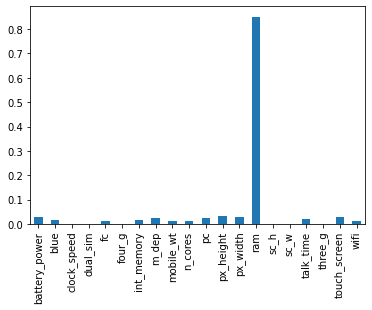

In [66]:
from matplotlib import pyplot as plt
feature_importance.plot(kind='bar')
plt.plot

### Concatenate two dataframes together

In [67]:
df_scores = pd.DataFrame(important_features)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores

,0,0
0,battery_power,0.028114
1,blue,0.015968
2,clock_speed,0.000000
3,dual_sim,0.000000
4,fc,0.011679
5,four_g,0.000000
6,int_memory,0.017152
7,m_dep,0.024616
8,mobile_wt,0.012431
9,n_cores,0.010245


### Add column names as Specs and Scores for the above dataframe

In [68]:
feature_scores.columns = ['Specs', 'Scores']

### Which are the best features?

In [69]:
feature_scores.nlargest(10, 'Scores')

,Specs,Scores
13,ram,0.850332
11,px_height,0.031657
12,px_width,0.028500
0,battery_power,0.028114
18,touch_screen,0.027819
7,m_dep,0.024616
10,pc,0.024555
16,talk_time,0.020660
6,int_memory,0.017152
1,blue,0.015968
